In [1]:
import numpy as np # for mathametical modeling
import pandas as pd # for importing libraries
import matplotlib.pyplot as plt # for visualizing the data


**DATA EXPLORATION**

In [2]:
df=pd.read_csv(r'D:\data science\partice_projects\machin learning projects\linear regression\Insurance\insurance.csv',encoding='ISO-8859-1')

In [14]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [29]:
df.shape


(1287, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [17]:
df.isnull().sum() # to check for null values

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [18]:
df.isnull().sum().sum() # for total null values

52

In [3]:
df.dropna(inplace=True) # to drop null values

In [20]:
df.isnull().sum().sum()

0

In [24]:
df.duplicated().sum() # check duplicate values

0

In [ ]:
df.drop_duplicates() # drop if any duplicates

In [4]:
col=list(df.columns) # to find outliers we stored the column name in a list called col
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

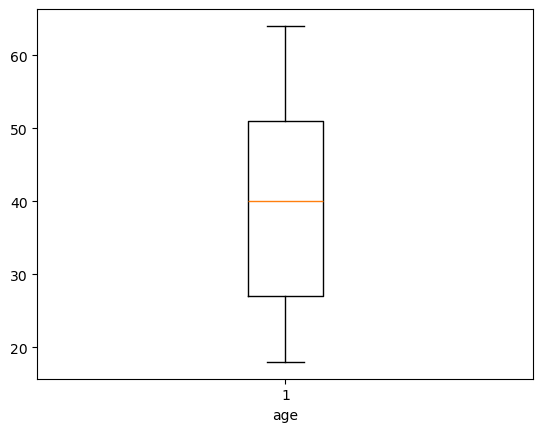

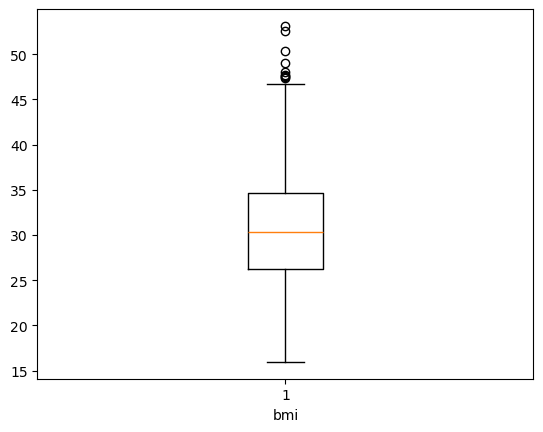

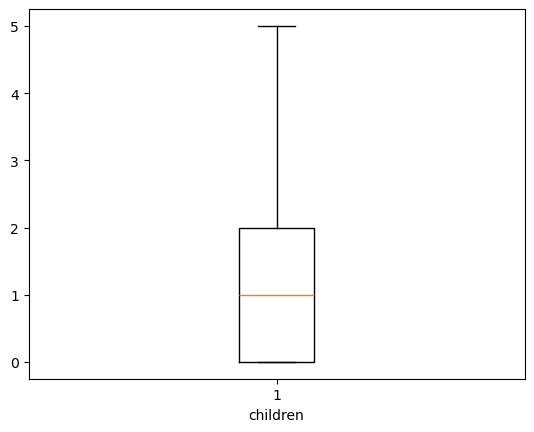

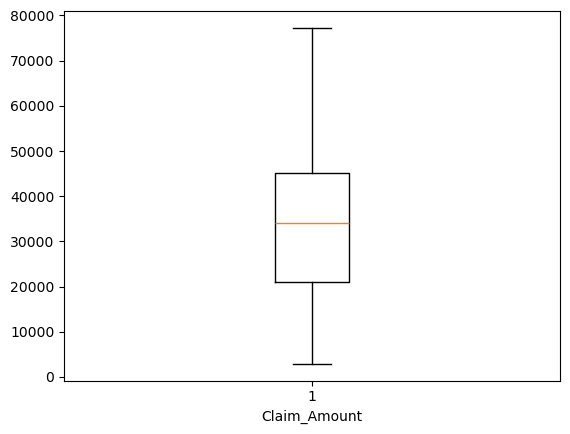

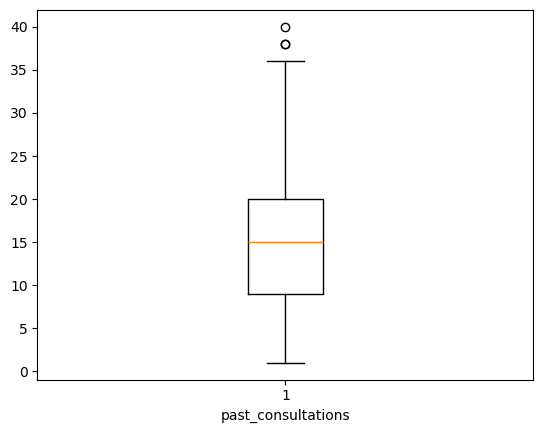

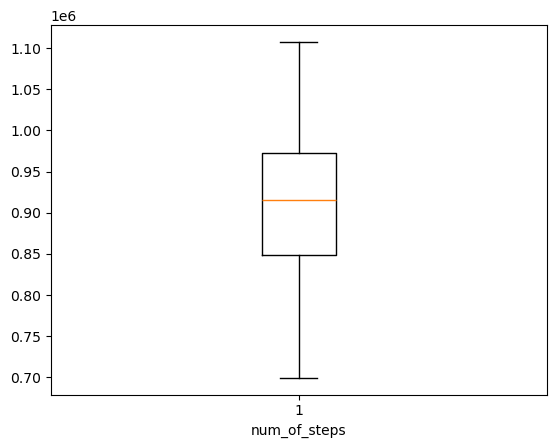

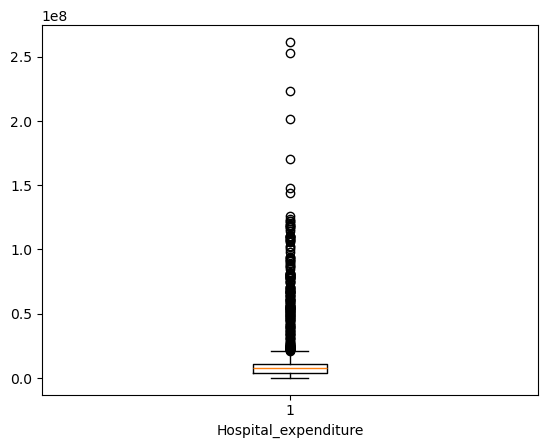

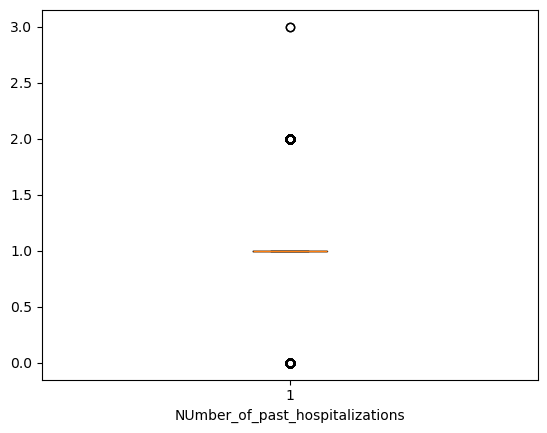

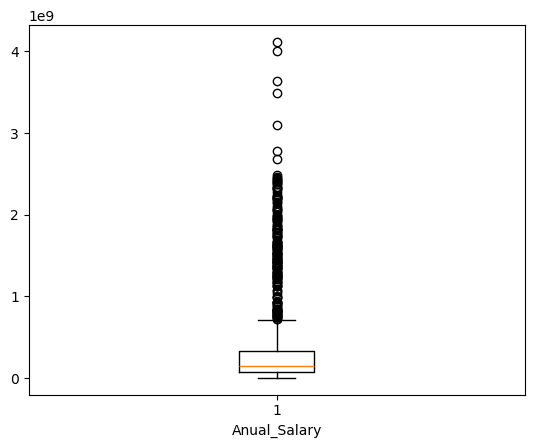

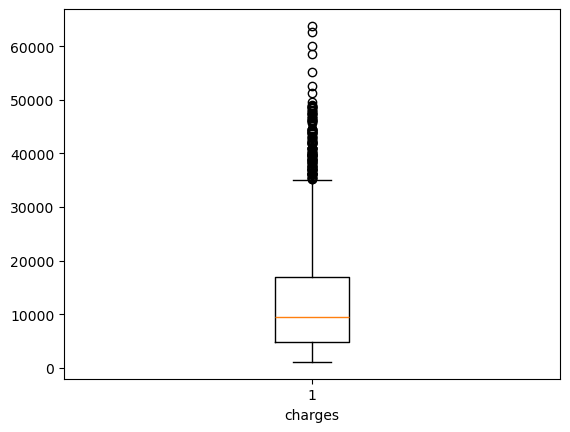

In [5]:
for i in col: # we ploted a box plot to check the outliers
    if df[i].dtypes=="float64":
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()
        

*we found that there are outliers in bmi,salary,past_consulatations,hospital_exp,no_of_past_hospitalizations*


In [6]:
# to remove outliers 
Q1=df.bmi.quantile(0.25)
Q3=df.bmi.quantile(0.75)
IQR=Q3-Q1
UF=Q3+1.5*IQR
LF=Q1-1.5*IQR
df=df[(df.bmi>=LF) & (df.bmi<=UF)]

Q1=df.past_consultations.quantile(0.25)
Q3=df.past_consultations.quantile(0.75)
IQR=Q3-Q1
UF=Q3+1.5*IQR
LF=Q1-1.5*IQR
df=df[(df.past_consultations>=LF ) & (df.past_consultations<=UF)]

Q1=df.Hospital_expenditure.quantile(0.25)
Q3=df.Hospital_expenditure.quantile(0.75)
IQR=Q3-Q1
UF=Q3+1.5*IQR
LF=Q1-1.5*IQR
df=df[(df.Hospital_expenditure>=LF) & (df.Hospital_expenditure<=UF)]

Q1=df.NUmber_of_past_hospitalizations.quantile(0.25)
Q3=df.NUmber_of_past_hospitalizations.quantile(0.75)
IQR=Q3-Q1
UF=Q3+1.5*IQR
LF=Q1-1.5*IQR
df=df[(df.NUmber_of_past_hospitalizations>=LF) & (df.NUmber_of_past_hospitalizations<=UF)]

Q1=df.Anual_Salary.quantile(0.25)
Q3=df.Anual_Salary.quantile(0.75)
IQR=Q3-Q1
UF=Q3+1.5*IQR
LF=Q1-1.5*IQR
df=df[(df.Anual_Salary>=LF) & (df.Anual_Salary<=UF)]

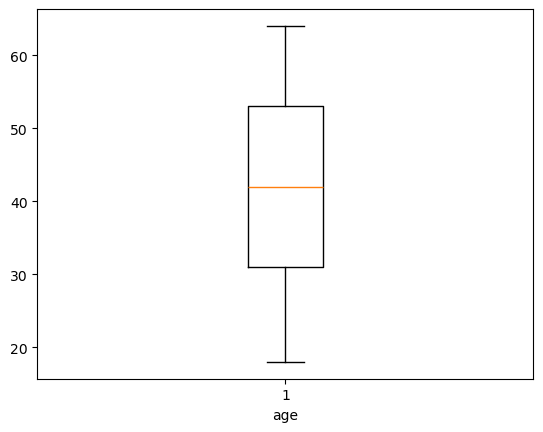

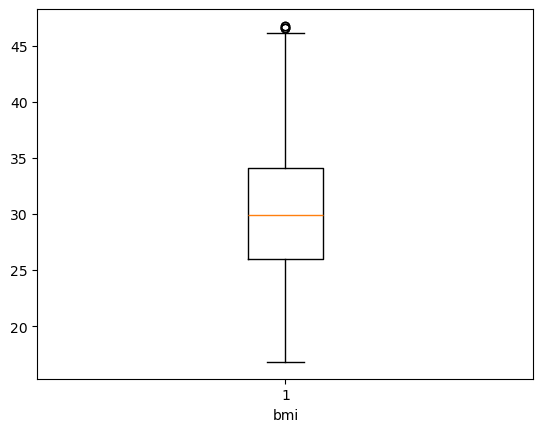

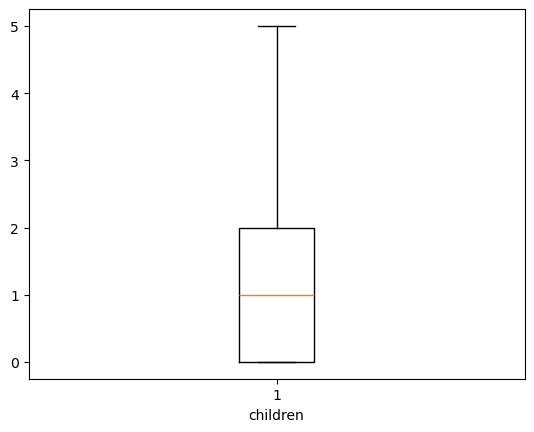

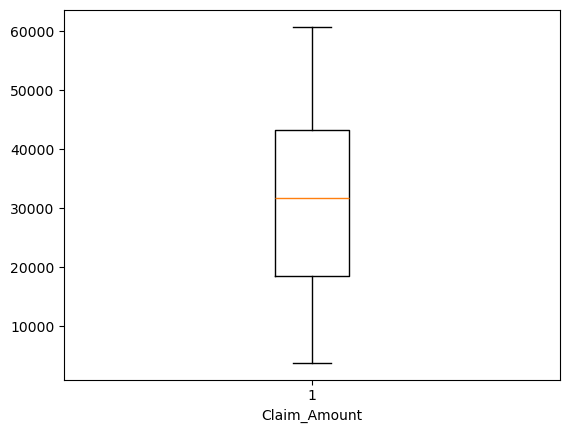

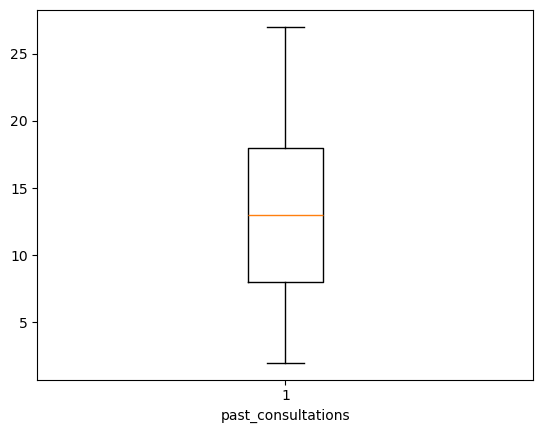

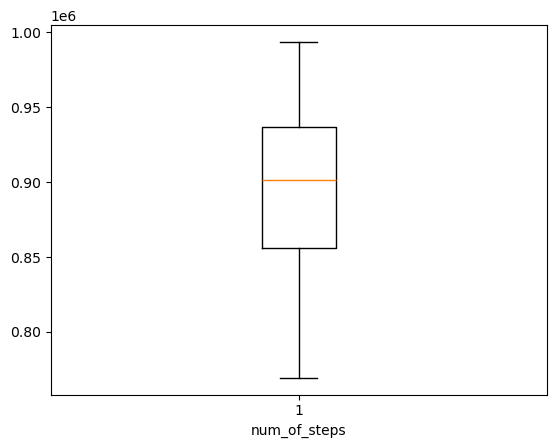

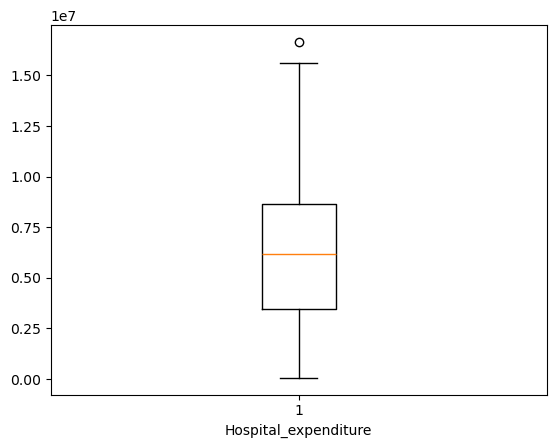

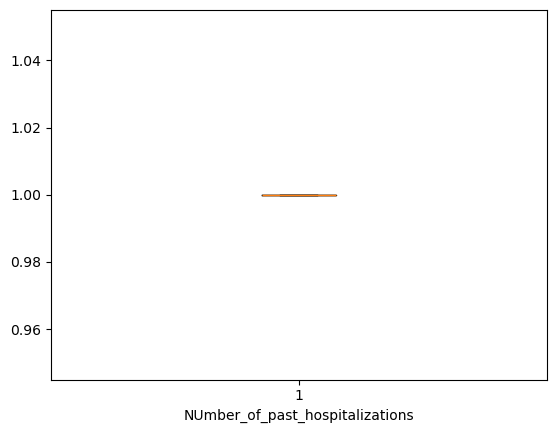

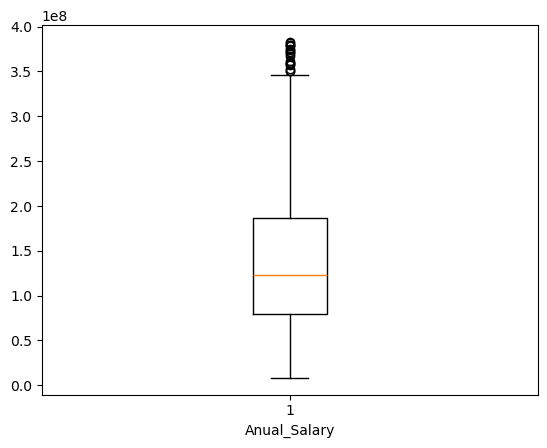

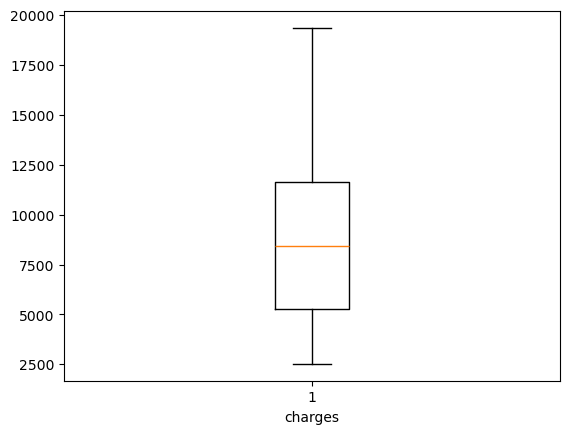

In [7]:
for i in col: 
    if df[i].dtypes=="float64":
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [8]:
df.shape

(851, 13)

***LINEAR REGRESSION***

In [34]:
X=df.iloc[:,:-1]
y=df["charges"]
X

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.130,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2
1041,24.0,0,27.600,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3


* To convert catogrical data to numerial values we need to do label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder #importing label encoder library

In [25]:
le=LabelEncoder()

In [28]:
for i in col:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [29]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,2523.16950
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1,2527.81865
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,2534.39375
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2,2566.47070
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43.0,1,20.130,2.0,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,2,18767.73770
1041,24.0,0,27.600,0.0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,3,18955.22017
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400


In [35]:
#data split for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
# 20 % of data goes to testing and rest goes to training

In [36]:
X_train.shape

(680, 12)

In [38]:
y_train.shape

(680,)

In [39]:
X_test.shape

(171, 12)

In [40]:
y_test.shape

(171,)

In [41]:
#importing linear regression model library
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [42]:
lr.fit(X_train,y_train) # training the model

LinearRegression()

In [44]:
ypred=lr.predict(X_test) #predicting the values

In [45]:
ypred  # predicted value

array([ 4359.67120699,  6831.41606944, 10353.00989297, 15281.8524659 ,
        7824.84403662, 11936.89589504,  9495.74624531, 15072.57178836,
       13841.19399106, 13690.58118616, 12169.0643001 , 11806.43936393,
        8969.31116975,  8609.12425442, 10061.12575691,  7267.70514131,
        6365.21230966, 11491.33651567, 13575.12210022, 15033.21584033,
        3778.53995795, 11509.17559137, 14331.20664551,  5832.23373835,
       11799.75725548, 13387.67985052,  4664.8356264 , 13111.79113907,
        9602.68249148,  7532.7109011 ,  9451.56441262,  8998.60152129,
       11168.99060385, 13034.71688685, 10436.39595603,  9617.5773741 ,
        6304.44817249,  6974.10507382,  2799.0618284 ,  8963.26020546,
        6503.28628578, 11339.31722461,  7068.33176057,  3166.94353922,
        4991.94607422,  9759.46887139,  5698.56080209,  8325.19011402,
        6617.82897146,  6645.39942658, 16479.36679925, 10018.30900285,
        4828.27630216,  9463.7614423 ,  9706.25462443,  5718.34008555,
      

*Now we need to check the performance*

In [46]:
y_test # we can manually compare and see there's less loss function

218     3353.47030
486     6753.03800
839    11884.04858
980    15006.57945
568     7985.81500
          ...     
530     7337.74800
158     2632.99200
675     9447.38240
310     4463.20510
706     9877.60770
Name: charges, Length: 171, dtype: float64

In [47]:
from sklearn.metrics import *

In [49]:
score=r2_score(y_test,ypred)*100
score

95.81786734813313

*****So we got the score as 95.81 this means model is performing good since its a small data set I could achive high score.If it was less we could have done hyper tuning ,but now if we do there's chance of model becoming overfit.*****

Text(0, 0.5, 'Actual values')

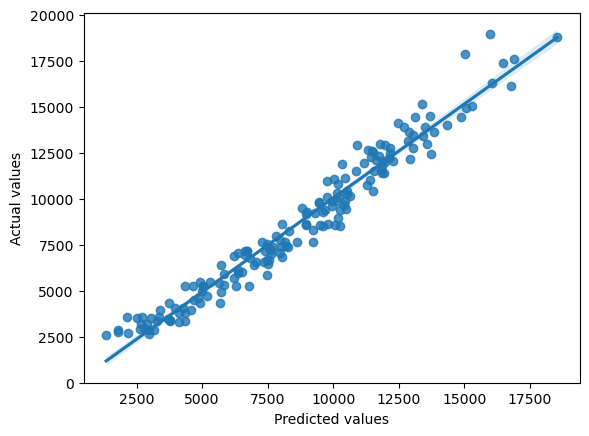

In [51]:
#Now lets plot the best fit line
import seaborn as sns
sns.regplot(x=ypred,y=y_test)
plt.xlabel('Predicted values')
plt.ylabel("Actual values")